# Random Forest Classifier Analysis

## Overview
This notebook demonstrates the implementation and evaluation of a Random Forest Classifier on a dataset. It includes steps for data preprocessing, model training, evaluation, and visualization of results.

### 1. Import Libraries
The following libraries are imported for data manipulation, modeling, and visualization:

In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

### 2. Load the Dataset

In [2]:
df=pd.read_csv("D:\WORK\ASS-VOICE\Classifier/features.csv")
print(df.shape)
df.head(5)

(40, 18)


,filename,class,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,zcr_1,f0_mean_1,energy_1
0,s_1.wav,normal,-3.688601,-18.275208,1.358998,0.564635,0.671002,0.552341,0.151903,0.046595,0.066225,0.124439,-0.040726,0.087348,-0.107995,0.164764,209.276290,0.052314
1,s_10.wav,normal,-3.640741,-18.237952,1.585026,0.544098,0.458244,0.331254,0.390097,0.239959,0.151996,0.218480,-0.073647,0.044199,-0.003167,0.176973,180.597811,0.051724
2,s_2.wav,normal,-2.900105,-17.727488,1.419496,1.032729,0.403349,0.323114,0.218857,0.100398,0.310002,0.194405,0.093751,-0.021796,0.005891,0.144807,205.796105,0.069507
3,s_3.wav,normal,0.423260,-12.068169,2.466119,-0.058979,0.380386,0.310708,0.317560,-0.060691,0.131867,0.042507,0.052714,-0.020887,0.033638,0.045392,176.180642,0.069552
4,s_4.wav,normal,-323.199728,-896.015411,1.050872,0.281539,0.319512,0.113630,0.161183,-0.032607,0.122090,0.016814,0.095490,-0.143906,0.094268,0.061173,336.055686,0.110312


Drop the column named 'Filename' as its insignificant

In [3]:
df=df.drop('filename',axis=1)
df.head(5)

,class,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,zcr_1,f0_mean_1,energy_1
0,normal,-3.688601,-18.275208,1.358998,0.564635,0.671002,0.552341,0.151903,0.046595,0.066225,0.124439,-0.040726,0.087348,-0.107995,0.164764,209.276290,0.052314
1,normal,-3.640741,-18.237952,1.585026,0.544098,0.458244,0.331254,0.390097,0.239959,0.151996,0.218480,-0.073647,0.044199,-0.003167,0.176973,180.597811,0.051724
2,normal,-2.900105,-17.727488,1.419496,1.032729,0.403349,0.323114,0.218857,0.100398,0.310002,0.194405,0.093751,-0.021796,0.005891,0.144807,205.796105,0.069507
3,normal,0.423260,-12.068169,2.466119,-0.058979,0.380386,0.310708,0.317560,-0.060691,0.131867,0.042507,0.052714,-0.020887,0.033638,0.045392,176.180642,0.069552
4,normal,-323.199728,-896.015411,1.050872,0.281539,0.319512,0.113630,0.161183,-0.032607,0.122090,0.016814,0.095490,-0.143906,0.094268,0.061173,336.055686,0.110312


### 3. Data Preprocessing
- Handling missing values

In [4]:
NAs=pd.concat([df.isnull().sum()],axis=1)
NAs[NAs.sum(axis=1)>0]

,0


Pop out the 'class' column as it contains target variable

In [5]:
labels=df.pop("class")

### 4. Splitting Data
The data is split into training and testing sets.

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(df,labels,test_size=0.25)

- Encoding categorical variables

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_val_encoded = le.fit_transform(Y_val)

# Print the encoded labels to verify
print("Encoded labels (Y_val_encoded):")
print(Y_val_encoded)
# Print the class mapping
print("Class mapping:")
for idx, class_name in enumerate(le.classes_):
    print(f'{idx}: {class_name}')

Encoded labels (Y_val_encoded):
[1 1 1 2 3 0 3 2 1 3]
Class mapping:
0: dysarthia
1: normal
2: stuttering
3: tremor


In [8]:
from sklearn.preprocessing import label_binarize

# Assuming there are 4 classes (based on the unique classes in Y_val_encoded)
n_classes = 4

# Binarize the numeric labels
Y_val_bin = label_binarize(Y_val_encoded, classes=[0, 1, 2, 3])

# Print binarized labels to verify
print("Binarized labels (Y_val_bin):")
print(Y_val_bin)


Binarized labels (Y_val_bin):
[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]


### 5. Model Training
A Random Forest Classifier is instantiated and trained on the training data.

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

### 6. Model Predictions
Predictions are made on the test set.

In [10]:
y_pred=rf.predict_proba(X_val)

In [ ]:
y_pred

### 7. ROC Curve
The ROC curve is computed and plotted for multiclass classification.

Binarized labels (Y_val_bin):
[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]


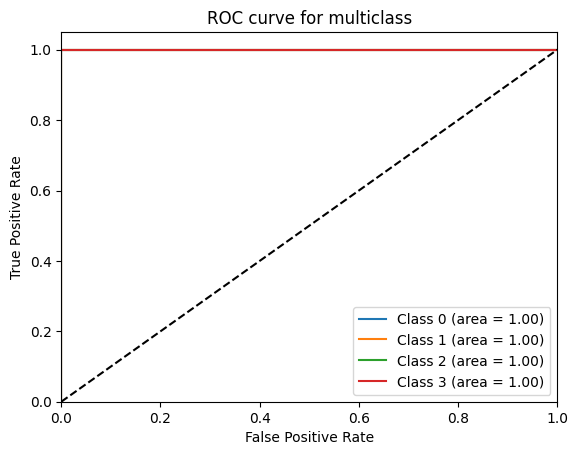

In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Print binarized labels to check if there are positive samples for each class
print("Binarized labels (Y_val_bin):")
print(Y_val_bin)

# Compute ROC curve and ROC area for each class
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()

for i in range(n_classes):
    if Y_val_bin[:, i].sum() == 0:
        print(f"Skipping class {i} because it has no positive samples in the validation set.")
        continue  # Skip if no positive samples for this class

    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(Y_val_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])

# Plot ROC curve for each class
for i in range(n_classes):
    if i in false_positive_rate:  # Plot only for classes with valid ROC
        plt.plot(false_positive_rate[i], true_positive_rate[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multiclass')
plt.legend(loc="lower right")
plt.show()



### 7. Evaluation
- **Classification Report**: This includes precision, recall, f1-score, and support.


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict using the test set
y_pred = rf.predict(X_val)

# Accuracy
accuracy = accuracy_score(Y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision, Recall, F1 Score
precision = precision_score(Y_val, y_pred, average='weighted')
recall = recall_score(Y_val, y_pred, average='weighted')
f1 = f1_score(Y_val, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(Y_val, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.90
Precision: 0.93
Recall: 0.90
F1 Score: 0.90
Confusion Matrix:
[[1 0 0 0]
 [0 3 1 0]
 [0 0 2 0]
 [0 0 0 3]]


- **Confusion Matrix**: This matrix is visualized to show the performance of the model.

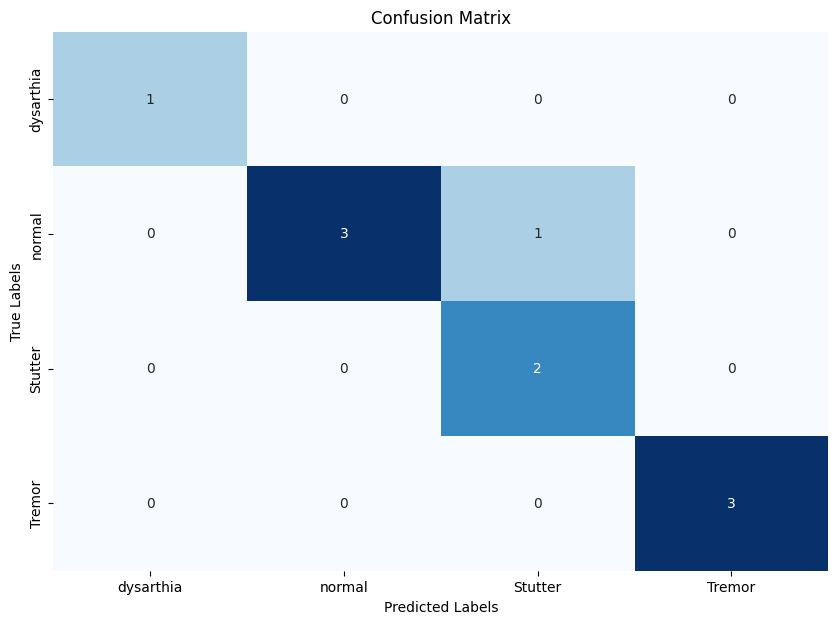

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_val, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['dysarthia', 'normal', 'Stutter', 'Tremor'],  # Modify as per your class labels
            yticklabels=['dysarthia', 'normal', 'Stutter', 'Tremor'])  # Modify as per your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Conclusion
The Random Forest Classifier provides a robust method for classification tasks, and with proper evaluation metrics, the performance of the model can be assessed effectively.
